# 월별데이타 PortFolio Score + Stop-Loss 주식채권현금 분산투자전략

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Finance Library import
from Library import FinanceLibrary as fl

##### File 읽어오기

In [2]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_daily_data.csv", encoding="utf-8")
df_bond10 = pd.read_csv("..\\Data\\KOSEF국고채10년_daily_data.csv", encoding="utf-8")
df_bond3 = pd.read_csv("..\\Data\\KODEX국고채3년_Daily_2010data.csv", encoding="utf-8")

In [3]:
# 해도 되고 안해도 되는 정렬
df_kodex = df_kodex.sort_values("Date")
df_bond10 = df_bond10.sort_values("Date")
df_bond3 = df_bond3.sort_values("Date")

##### KODEX 주간, 월간데이터 만들기

In [4]:
df_kodex["Date"] = pd.to_datetime(df_kodex["Date"])  # Converting date to pandas datetime format
df_kodex["Year"] = df_kodex["Date"].dt.year  # Getting year number
df_kodex["Month"] = df_kodex["Date"].dt.month  # Getting month number
df_kodex["Week_Number"] = df_kodex["Date"].dt.week  # Getting week number
df_kodex["WeekDay"] = df_kodex["Date"].dt.weekday
# 주간, 월간 Data만들기
df_kodex_week = df_kodex.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kodex_month = df_kodex.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채10년 주간,월간데이터 만들기

In [5]:
df_bond10["Date"] = pd.to_datetime(df_bond10["Date"])  # Converting date to pandas datetime format
df_bond10["Year"] = df_bond10["Date"].dt.year  # Getting year number
df_bond10["Month"] = df_bond10["Date"].dt.month  # Getting month number
df_bond10["Week_Number"] = df_bond10["Date"].dt.week  # Getting week number
df_bond10["WeekDay"] = df_bond10["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond10_week = df_bond10.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond10_month = df_bond10.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채3년 주간,월간데이터 만들기

In [6]:
df_bond3["Date"] = pd.to_datetime(df_bond3["Date"])  # Converting date to pandas datetime format
df_bond3["Year"] = df_bond3["Date"].dt.year  # Getting year number
df_bond3["Month"] = df_bond3["Date"].dt.month  # Getting month number
df_bond3["Week_Number"] = df_bond3["Date"].dt.week  # Getting week number
df_bond3["WeekDay"] = df_bond3["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond3_week = df_bond3.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond3_month = df_bond3.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기

In [7]:
# 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기
kodex_month = df_kodex_month.loc[(2011,42):]
bond10_month = df_bond10_month.loc[(2011,42):]
bond3_month = df_bond3_month.loc[(2011,42):]
# index Date로 재지정하기
kodex_month = kodex_month.reset_index()
kodex_month.index = pd.to_datetime(kodex_month["Date"])
kodex_month = kodex_month.sort_index()
bond10_month = bond10_month.reset_index()
bond10_month.index = pd.to_datetime(bond10_month["Date"])
bond10_month = bond10_month.sort_index()
bond3_month = bond3_month.reset_index()
bond3_month.index = pd.to_datetime(bond3_month["Date"])
bond3_month = bond3_month.sort_index()

##### re-scale

In [8]:
KODEX = kodex_month["Close"]/kodex_month["Close"][0]
KODEX = pd.DataFrame(np.round(KODEX,4))
BOND10 = bond10_month["Close"]/bond10_month["Close"][0]
BOND10 = pd.DataFrame(np.round(BOND10,4))
BOND3 = bond3_month["Close"]/bond3_month["Close"][0]
BOND3 = pd.DataFrame(np.round(BOND3,4))

##### Low, Close 등락율 구하기

In [9]:
# Low 데이타는 전일 Close와 비교하여 등락율을 구함
kodex_month_low = (kodex_month["Low"].shift(-1)/kodex_month["Close"] - 1) * 100
kodex_month_low = np.round(kodex_month_low, 4)
bond10_month_low = (bond10_month["Low"].shift(-1)/bond10_month["Close"] - 1) * 100
bond10_month_low = np.round(bond10_month_low, 4)
bond3_month_low = (bond3_month["Low"].shift(-1)/bond3_month["Close"] - 1) * 100
bond3_month_low = np.round(bond3_month_low, 4)
# Close 데이타는 전일 Close와 비교하여 등락율을 구함
kodex_month_close = np.round((kodex_month["Close"].shift(-1)/kodex_month["Close"] - 1) * 100, 4)
bond10_month_close = np.round((bond10_month["Close"].shift(-1)/bond10_month["Close"] - 1) * 100, 4)
bond3_month_close = np.round((bond3_month["Close"].shift(-1)/bond3_month["Close"] - 1) * 100, 4)
# Low와 Close 데이타 합치기
kodex = pd.concat([kodex_month_low.rename("Low"),kodex_month_close.rename("Close")],axis=1)
bond10 = pd.concat([bond10_month_low.rename("Low"),bond10_month_close.rename("Close")],axis=1)
bond3 = pd.concat([bond3_month_low.rename("Low"),bond3_month_close.rename("Close")],axis=1)

##### Low 값을 기준값과 비교하여 업데이트하기

# VAL

In [10]:
val = -3.5  # 기준값(판단값)
count = 0
for i in range(len(kodex)):
    if kodex["Low"][i] < val:
        kodex["Close"][i] = val
        count += 1
        
for i in range(len(bond10)):
    if bond10["Low"][i] < val:
        bond10["Close"][i] = val

for i in range(len(bond3)):
    if bond3["Low"][i] < val:
        bond3["Close"][i] = val

In [11]:
print (len(kodex))
print (count)

87
28


#### 모멘텀 수익률

In [12]:
# Stop Loss 사용
#kodex_momentum_return = pd.Series(kodex["Close"]/100 + 1, index=kodex_month.index)
#bond10_momentum_return = pd.Series(bond10["Close"]/100 + 1, index=bond10_month.index)
#bond3_momentum_return = pd.Series(bond3["Close"]/100 + 1, index=bond3_month.index)
# Stop Loss 미사용
KODEX["Tomorrow Retrun"] = fl.YesterdayReturn(KODEX)
KODEX["Tomorrow Retrun"][0] = 1  # 과거수익률임으로 첫번째 cell은 "1"로 채워준다
BOND10["Tomorrow Retrun"] = fl.YesterdayReturn(BOND10)
BOND10["Tomorrow Retrun"][0] = 1
BOND3["Tomorrow Retrun"] = fl.YesterdayReturn(BOND3)
BOND3["Tomorrow Retrun"][0] = 1

##### 평균모멘텀 스코어 구하기

# Momentum? 6months

In [13]:
# KODEX 평균모멘텀 스코어, 기간설정
KODEX["Avg Mo-Score"] = fl.AverageMomentum(KODEX["Close"],6)
# BOND 평균모멘텀 스코어, 기간설정
BOND10["Avg Mo-Score"] = fl.AverageMomentum(BOND10["Close"],6)

In [14]:
# 투자 비중 = KODEX / ( KODEX 12개월 평균 모멘텀 + BOND10 12개월 평균 모멘텀 + 1(3개월 펀드=현금))
# 현금에 해당하는 3년국채는 "1" 비율만큼 항상 투입된다
KODEX["Ratio"] = np.round(KODEX["Avg Mo-Score"]/ (KODEX["Avg Mo-Score"] + BOND10["Avg Mo-Score"]  + 1),4)
BOND10["Ratio"] = np.round(BOND10["Avg Mo-Score"]/ (KODEX["Avg Mo-Score"] + BOND10["Avg Mo-Score"] + 1),4)
BOND3["Ratio"] = np.round(1 - (BOND10["Ratio"] + KODEX["Ratio"]),4)

# PortFolio Score 비율 투자

In [15]:
# 마켓스코어 구하기
#market_score = fl.MarketScore(KODEX)
#MarketScore = pd.Series(market_score, index=kodex_month.index)
#MarketScore = MarketScore.rolling(window=8,min_periods=1).mean()

#MarketCash = 1 - MarketScore

In [16]:
'''
#모멘텀비중 투자
모멘텀배분수익 = (MarketScore * kodex_momentum_return * kodex_ratio) + (MarketScore * bond10_momentum_return * bond10_ratio)\
            + (MarketScore * bond3_momentum_return * cash_ratio)
mo_val = 모멘텀배분수익 + bond3_momentum_return*MarketCash
모멘텀배분TRI = np.cumprod(mo_val)  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
# 동일비중 투자
균등배분수익 = MarketScore* kodex_momentum_return * 0.3333 + MarketScore * bond10_momentum_return * 0.3333 + MarketScore * bond3_momentum_return * 0.3334
avg_val = 균등배분수익 + bond3_momentum_return*MarketCash
균등배분TRI = np.cumprod(avg_val) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
'''

'\n#모멘텀비중 투자\n모멘텀배분수익 = (MarketScore * kodex_momentum_return * kodex_ratio) + (MarketScore * bond10_momentum_return * bond10_ratio)            + (MarketScore * bond3_momentum_return * cash_ratio)\nmo_val = 모멘텀배분수익 + bond3_momentum_return*MarketCash\n모멘텀배분TRI = np.cumprod(mo_val)  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유\n# 동일비중 투자\n균등배분수익 = MarketScore* kodex_momentum_return * 0.3333 + MarketScore * bond10_momentum_return * 0.3333 + MarketScore * bond3_momentum_return * 0.3334\navg_val = 균등배분수익 + bond3_momentum_return*MarketCash\n균등배분TRI = np.cumprod(avg_val) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유\n'

# PortFolio Score 비율투자

In [17]:
PortFolio = pd.DataFrame()
PortFolio["오리지널 현금투자 금액"] = KODEX["Ratio"] + BOND10["Ratio"]
PortFolio.head()

,오리지널 현금투자 금액
Date,
2012-01-31,0.0000
2012-02-29,0.1429
2012-03-30,0.1429
2012-04-30,0.4000
2012-05-31,0.4000


In [18]:
#모멘텀비중 투자
PortFolio["Pre수익"] = (KODEX["Tomorrow Retrun"] * KODEX["Ratio"]) + (BOND10["Tomorrow Retrun"] * BOND10["Ratio"])\
            + (BOND3["Tomorrow Retrun"] * BOND3["Ratio"])
PortFolio["Pre수익"] = np.round(PortFolio["Pre수익"],4)
PortFolio["Pre누적수익"] = np.cumprod(PortFolio["Pre수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
# 동일비중 투자
PortFolio["Pre균등수익"] = KODEX["Tomorrow Retrun"] * 0.3333 + BOND10["Tomorrow Retrun"] * 0.3333 + BOND3["Tomorrow Retrun"] * 0.3334
PortFolio["Pre균등누적수익"] = np.cumprod(PortFolio["Pre균등수익"]) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유

# 수익곡선 포트폴리오, 기간 6개월

In [19]:
PortFolio["오리지널 현금투자 금액"].tail()

Date
2018-11-30    0.5384
2018-12-28    0.5384
2019-01-31    0.5714
2019-02-28    0.6000
2019-03-06    0.5385
Name: 오리지널 현금투자 금액, dtype: float64

In [20]:
# 모멘텀 투자
PortFolio["포트투자 금액"] = fl.AverageMomentum(PortFolio["Pre누적수익"],6)
PortFolio["현금투자 금액"] = 1 - PortFolio["포트투자 금액"]

PortFolio["Momentum Return"] = PortFolio["포트투자 금액"] * (KODEX["Tomorrow Retrun"] * KODEX["Ratio"] + (BOND10["Tomorrow Retrun"]* BOND10["Ratio"])\
            + (BOND3["Tomorrow Retrun"] * BOND3["Ratio"]))
PortFolio["Momentum Cash Return"] = PortFolio["현금투자 금액"] * BOND3["Tomorrow Retrun"]
PortFolio["모멘텀 최종수익"] = PortFolio["Momentum Return"] + PortFolio["Momentum Cash Return"]
PortFolio["모멘텀 최종누적수익"] = np.cumprod(PortFolio["모멘텀 최종수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
# 동일비중 투자
PortFolio["Pre 균등-Score"] = pd.Series(fl.AverageMomentum(PortFolio["Pre균등누적수익"],1), index=PortFolio["Pre균등누적수익"].index)
PortFolio["Pre 균등 Cash"] = 1 - PortFolio["Pre 균등-Score"]

PortFolio["균등 수익"] = PortFolio["Pre 균등-Score"] * (KODEX["Tomorrow Retrun"] * PortFolio["Pre 균등-Score"]/3 + BOND10["Tomorrow Retrun"] * PortFolio["Pre 균등-Score"]/3 + BOND3["Tomorrow Retrun"] * PortFolio["Pre 균등-Score"]/3)
PortFolio["균등 현금수익"] = BOND3["Tomorrow Retrun"] * PortFolio["Pre 균등 Cash"]
PortFolio["균등 최종수익"] = PortFolio["균등 수익"] + PortFolio["균등 현금수익"]
PortFolio["균등 최종누적수익"] = np.cumprod(PortFolio["균등 최종수익"])

##### 포트 투자비율 비교하기

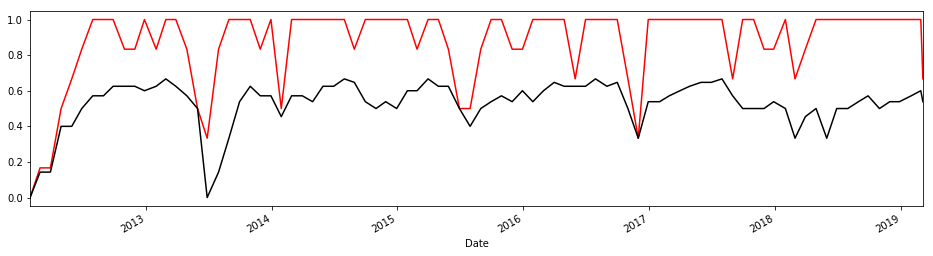

In [27]:
PortFolio["포트투자 금액"].plot(color="Red")
PortFolio["오리지널 현금투자 금액"].plot(color="Black",figsize=(16,4))

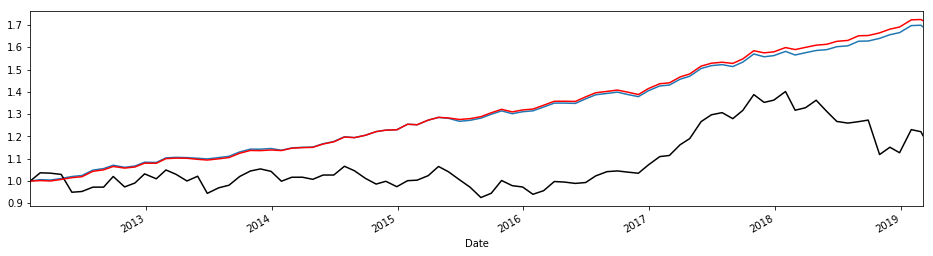

In [22]:
PortFolio["Pre누적수익"].plot(figsize=(16,4))
KODEX["Close"].plot(color="Black")
PortFolio["모멘텀 최종누적수익"].plot(color="Red")

In [23]:
# csv로 저장
PortFolio.to_csv("PortFolio.csv",sep=",",encoding="euc-kr")

##### Pew모멘텀 vs 모멘텀 비교하기

In [24]:
kodex = fl.Portfolio(KODEX["Close"],"KODEX")
bond10 = fl.Portfolio(BOND10["Close"],"BOND10")
cash = fl.Portfolio(BOND3["Close"],"CASH")
모멘텀 = fl.Portfolio(PortFolio["모멘텀 최종누적수익"],"PortFolio 모멘텀 최종누적수익")
pre모멘텀tri = fl.Portfolio(PortFolio["Pre누적수익"],"PortFolio Pre누적수익")

result = pd.concat([kodex,bond10,cash,모멘텀,pre모멘텀tri],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KODEX,1.0,1.203700,2.3446,0.129219,-20.1555,0.080742
BOND10,1.0,1.362200,3.9394,0.112059,-8.3089,0.314200
CASH,1.0,1.217700,2.4926,0.063621,-1.2416,0.626054
PortFolio 모멘텀 최종누적수익,1.0,1.719515,7.0103,0.214670,-1.4153,0.798635
PortFolio Pre누적수익,1.0,1.691675,6.7922,0.204704,-1.4547,0.735247


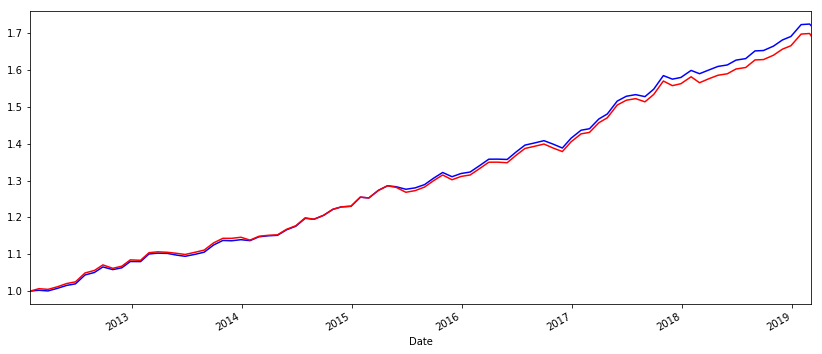

In [25]:
PortFolio["모멘텀 최종누적수익"].plot(color="Blue", figsize=(14,6))
PortFolio["Pre누적수익"].plot(color="Red", figsize=(14,6))

In [26]:
균등배분TRI.plot(color="Blue")
pre균등배분TRI.plot(color="Red")

NameError: name '균등배분TRI' is not defined

##### 최빈값구하기

In [ ]:
returns = KODEX.pct_change() * 100  # 수익률 %구하기
returns = np.round(returns,4)  # %단위로 환산, 자리수 정리

In [ ]:
from collections import Counter
cnt = Counter(returns)
order = cnt.most_common()  # 내림차순
cnt.most_common(5)  # 빈도 상위5개

##### Histogram 

In [ ]:
cnt = sorted(cnt, key=cnt.get,reverse=True)  # counter객체에서 value로 list객체 만들기
data = [x for x in cnt if ~np.isnan(x)]  # list에서 nan 제거

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

plt.figure(figsize=(14,4))
plt.hist(data,rwidth=0.8, bins=100, alpha=0.8)
plt.grid(True)

In [ ]:
print ("전체 갯수:",len(data))
each = [x for x in data if x < -3]
print ("조건 갯수:",len(each))

##### 포트폴리오 성과 비교하기

In [ ]:
kodex = fl.Portfolio(KODEX,"KODEX")
bond10 = fl.Portfolio(BOND10,"BOND10")
cash = fl.Portfolio(BOND3,"CASH")
tri = fl.Portfolio(모멘텀배분TRI,"모멘텀배분TRI")
균등tri = fl.Portfolio(균등배분TRI,"균등배분TRI")

result = pd.concat([kodex,bond10,cash,tri,균등tri],axis=1)
pd.DataFrame(result).T

### 그래프

In [ ]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title("Returns")
ax1.plot(KODEX,color="Black",label="KODEX")
ax1.plot(BOND10,label="BOND10")
ax1.plot(BOND3,label="CASH")
ax1.plot(모멘텀배분TRI,color="Red",label="모멘텀배분TRI")
ax1.plot(균등배분TRI,color="Blue",label="균등배분TRI")
ax1.grid()
ax1.legend(loc=2)

ax2.set_title("Ratio")
ax2.plot(kodex_ratio,color="Black", label="KODEX")
ax2.plot(bond10_ratio, label="BOND10")
ax2.plot(cash_ratio, label="CASH")
ax2.grid()
ax2.legend(loc=2)

ax3.set_title("Score")
ax3.plot(kodex_average_score, color="Black", label="kodex_average_score")
ax3.plot(bond10_average_score, color="Red", label="bond10_average_score")
ax3.grid()
ax3.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
plt.tight_layout()
plt.show()